In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [2]:
dados = datasets.load_boston()

/home/tiago/anaconda3/envs/mldl/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

In [3]:
print(dados.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
dados.data[:5,:3]

array([[6.320e-03, 1.800e+01, 2.310e+00],
       [2.731e-02, 0.000e+00, 7.070e+00],
       [2.729e-02, 0.000e+00, 7.070e+00],
       [3.237e-02, 0.000e+00, 2.180e+00],
       [6.905e-02, 0.000e+00, 2.180e+00]])

In [5]:
df = pd.DataFrame(dados.data, columns=dados.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
alvo = pd.DataFrame(dados.target, columns = ["MEDV"])
alvo.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [7]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'RM vs MEDV')

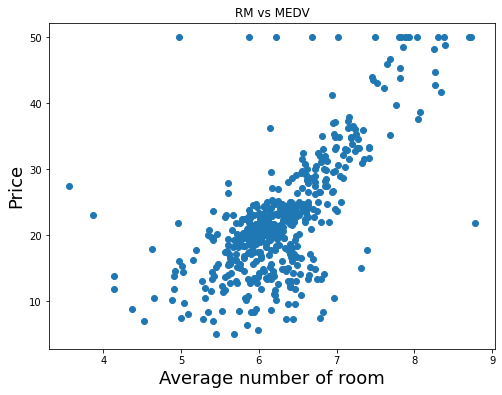

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(df["RM"], alvo["MEDV"])
plt.xlabel("Average number of room", fontsize = 18)
plt.ylabel("Price", fontsize = 18)
plt.title("RM vs MEDV")

In [9]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [10]:
df.loc[:5,"RM"]

0    6.575
1    6.421
2    7.185
3    6.998
4    7.147
5    6.430
Name: RM, dtype: float64

In [11]:

dados.data[:,5].shape

(506,)

In [12]:
#convertendo em matrix [,1]
dados_formatados = dados.data[:,5].reshape(-1,1)

In [13]:
alvo_formatado = dados.target.reshape(-1,1)

In [14]:
X_treino, X_teste,y_treino, y_teste = train_test_split(dados_formatados,alvo_formatado, random_state = 0)

In [15]:
regressor = linear_model.LinearRegression()

In [16]:
# y = b0 + b1x
regressor.fit(X_treino,y_treino)

LinearRegression()

In [17]:
regressor.intercept_

array([-36.18099265])

In [18]:
regressor.coef_

array([[9.31294923]])

In [19]:
y_pred = regressor.predict(X_teste)

In [20]:
-36.18099265 + 9.31294923*X_teste[0,0]

22.79791482359

In [21]:
y_pred[0]

array([22.7979148])

In [22]:
regressor.score(X_teste,y_teste)

0.4679000543136781

In [23]:
from sklearn import metrics

In [24]:
metrics.r2_score(y_teste,y_pred)

0.4679000543136781

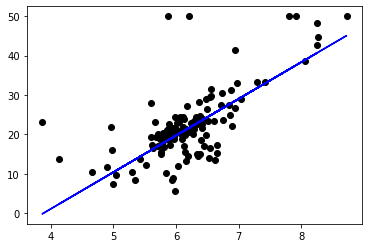

In [25]:
plt.scatter(X_teste,y_teste, color = "black")
plt.plot(X_teste,y_pred,c = "blue")

In [26]:
# calcul dos componentes a mão
#b1 = (sum(x*y) - n*mean_x*mean_y) / (sum(x^2)-n*mean_x^2)
#b0 = mean_y-b1*mean_x


In [27]:
soma_xy = sum(X_treino*y_treino)
soma_xy

array([55784.0185])

In [28]:
soma_x_quadrado = sum(X_treino * X_treino)
soma_x_quadrado

array([15284.878423])

In [29]:
soma_x =  sum(X_treino)
soma_y = sum(y_treino)

In [30]:
media_x = np.mean(X_treino)
media_y = np.mean(y_treino)

In [31]:
n = len(X_treino)

In [32]:
#b1 = (sum(x*y) - n*mean_x*mean_y) / (sum(x^2)-n*mean_x^2)
b1 = (soma_xy - n*media_x*media_y) / (soma_x_quadrado - n*(media_x**2))
b1

array([9.31294923])

In [33]:
#b0 = mean_y-b1*mean_x
b0 = media_y - b1*media_x
b0

array([-36.18099265])

In [34]:
# y = b1X
regressor_no_inter = linear_model.LinearRegression(fit_intercept = False)

In [35]:
regressor_no_inter.fit(X_treino,y_treino)

LinearRegression(fit_intercept=False)

In [36]:
regressor_no_inter.coef_

array([[3.64962134]])

In [37]:
y_pred_no_inter = regressor_no_inter.predict(X_teste)

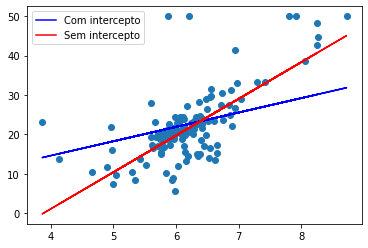

In [38]:
plt.scatter(X_teste,y_teste)
plt.plot(X_teste,y_pred_no_inter,c = "blue", label = "Com intercepto")
plt.plot(X_teste,y_pred,c = "red", label = "Sem intercepto")
plt.legend()

In [39]:
metrics.r2_score(y_teste,y_pred)

0.4679000543136781

In [40]:
metrics.r2_score(y_teste,y_pred_no_inter)

0.3169129644302805

In [41]:
import statsmodels.api as sm

In [42]:
X_treino2 = sm.add_constant(X_treino)

In [43]:
X_treino2[:5,:]

array([[1.   , 5.605],
       [1.   , 5.927],
       [1.   , 7.267],
       [1.   , 6.471],
       [1.   , 6.782]])

In [44]:
modelo = sm.OLS(y_treino,X_treino2).fit()

In [45]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     358.6
Date:                Wed, 09 Feb 2022   Prob (F-statistic):           1.10e-56
Time:                        09:49:30   Log-Likelihood:                -1253.7
No. Observations:                 379   AIC:                             2511.
Df Residuals:                     377   BIC:                             2519.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.1810      3.123    -11.585      0.000     -42.322     -30.040
x1             9.3129      0.492     18.938      0.000       8.346      10.280
==============================================================================
Omnibus:                       64.504   Durbin-Watson:                   1.880
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              435.392
Skew:                           0.482   Prob(JB):                     2.86e-95
Kurtosis:                       8.161   Cond. No.                         59.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
df[["RM","CRIM"]].head()

,RM,CRIM
0,6.575,0.00632
1,6.421,0.02731
2,7.185,0.02729
3,6.998,0.03237
4,7.147,0.06905


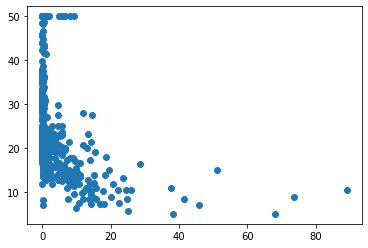

In [47]:
plt.scatter(df["CRIM"],alvo["MEDV"])

In [48]:
dados_formatado2 = df.loc[:,["RM","CRIM"]].values.reshape(-1,2)
dados_formatado2[:5,:5]

array([[6.575e+00, 6.320e-03],
       [6.421e+00, 2.731e-02],
       [7.185e+00, 2.729e-02],
       [6.998e+00, 3.237e-02],
       [7.147e+00, 6.905e-02]])

In [49]:
X_treino, X_teste,y_treino, y_teste = train_test_split(dados_formatado2, alvo_formatado, random_state = 0)

In [50]:
# y = bo + b1x1 + b2x2
regressor_mult = linear_model.LinearRegression()

In [51]:
regressor_mult.fit(X_treino,y_treino)

LinearRegression()

In [52]:
regressor_mult.intercept_

array([-30.64084019])

In [53]:
regressor_mult.coef_

array([[ 8.60817414, -0.31972309]])

In [54]:
y_pred_mult = regressor_mult.predict(X_teste)

In [55]:
-30.64084019 + 8.60817414*X_teste[0,0] + -0.31972309*X_teste[0,1]

23.853228458048395

In [56]:
y_pred_mult[0]

array([23.85322844])

In [57]:
metrics.r2_score(y_teste, y_pred)

0.4679000543136781

In [58]:
metrics.r2_score(y_teste, y_pred_mult)

0.44987515639345177